## 載入內建的MNIST dataset



In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

## RGB圖片格式為width, height, channels，加上ID數維度為。(ID, width, height, channel)

In [0]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)


# CNN模型的建立


## 匯入必要的模組(可自行添加需要的模組)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


## 建立模型(在下方建立自己的模型)
## 使用model.add()

In [0]:
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=(5), padding='same', input_shape=(28, 28, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=50, kernel_size=(3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


 

## review整個model

In [47]:
model.summary()       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 50)        11300     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               627456    
__________

## 訓練模型
## 評估訓練結果

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()



ValueError: ignored

## 顯示準確率


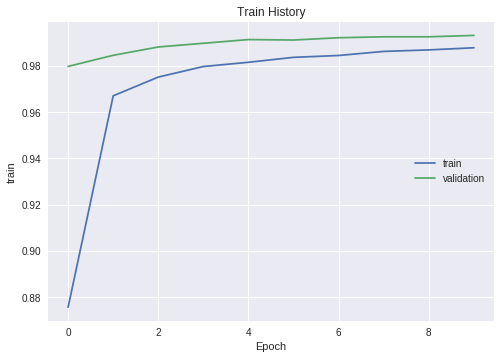

In [42]:
show_train_history(train_history, 'acc','val_acc')


## 顯示誤差率

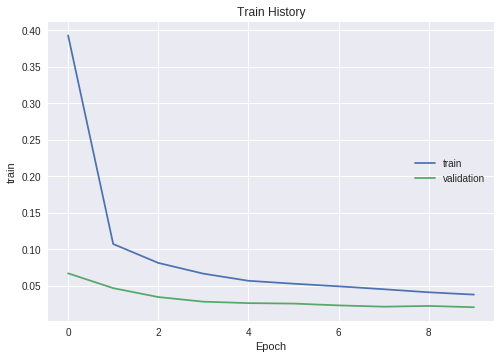

In [43]:
show_train_history(train_history, 'loss','val_loss')

## 使用test dataset來評估模型的準確率

In [44]:
scores = model.evaluate(X_test, y_test)
scores[1]

10000/10000 [==============================] - 1s 102us/step


0.9932

## 混淆矩陣

In [45]:
import pandas as pd
prediction = model.predict_classes(X_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,3,1,1,0
1,0,1134,0,0,0,0,1,0,0,0
2,0,0,1027,0,1,0,0,4,0,0
3,0,0,1,1002,0,3,0,3,1,0
4,0,0,0,0,976,0,0,0,0,6
5,0,0,0,3,0,888,1,0,0,0
6,2,2,0,0,1,2,951,0,0,0
7,0,1,4,0,0,0,0,1022,1,0
8,1,0,2,1,0,0,0,2,966,2
